# K-Means Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data=pd.DataFrame({"X":[1,3,4,5,1,4,1,2],
             "Y":[3,3,3,3,2,2,1,1]})

data

,X,Y
0,1,3
1,3,3
2,4,3
3,5,3
4,1,2
5,4,2
6,1,1
7,2,1


In [3]:
#number of clusters
num_clusters = 3

In [4]:
km = KMeans(n_clusters=num_clusters)
km.fit(data)

KMeans(n_clusters=3)

In [5]:
# pred represents the cluster number for each data point
pred=km.predict(data)
pred

array([2, 1, 1, 1, 2, 1, 0, 0], dtype=int32)

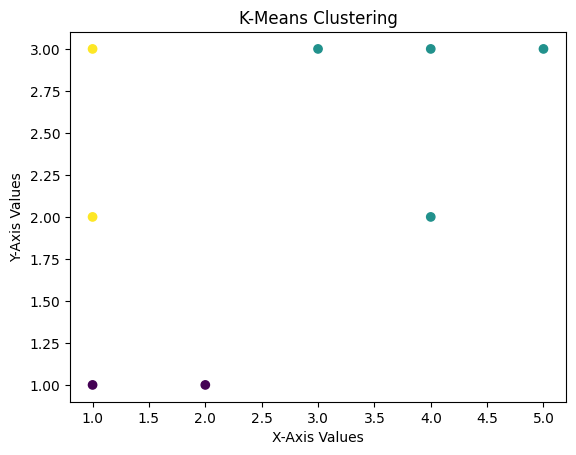

In [6]:
# Plot the Clusters
plt.scatter(data.X,data.Y,c=pred, marker="o")
# Set title of the plot
plt.title('K-Means Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()

## with random_state
[KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In [7]:
km = KMeans(n_clusters=num_clusters,random_state=7)
km.fit(data)
pred=km.predict(data)
pred

array([0, 1, 1, 1, 0, 1, 2, 2], dtype=int32)

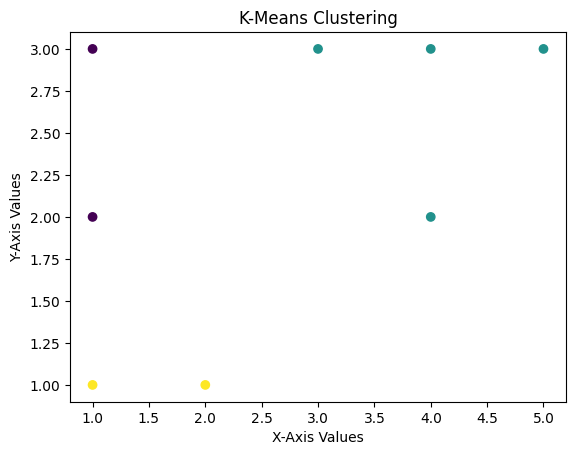

In [8]:
# Plot the Clusters
plt.scatter(data.X,data.Y,c=pred, marker="o")
# Set title of the plot
plt.title('K-Means Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()

In [9]:
centroids=km.cluster_centers_
centroids

array([[1.  , 2.5 ],
       [4.  , 2.75],
       [1.5 , 1.  ]])

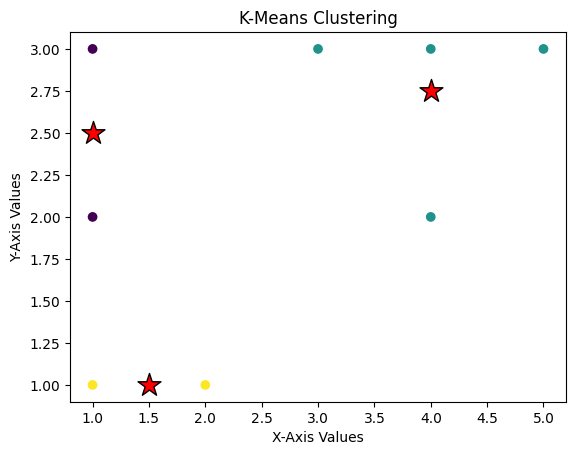

In [10]:
# Plot the Clusters
plt.scatter(data.X,data.Y,c=pred, marker="o")
# Set title of the plot
plt.title('K-Means Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
plt.scatter(centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
# Display the plot
plt.show()

In [11]:
#numbers of clusters for observations
km.labels_

array([0, 1, 1, 1, 0, 1, 2, 2], dtype=int32)

In [12]:
# Sum of squared distances of samples to their closest cluster center.
# It measures the intra-cluster dispersion. Lesser the inertia, more compact the clusters
km.inertia_

3.75

In [13]:
km = KMeans(n_clusters=num_clusters,random_state=7, verbose=2).fit(data)


Initialization complete
Iteration 0, inertia 7.0.
Iteration 1, inertia 3.75.
Converged at iteration 1: strict convergence.


The K-means algorithm aims to choose centroids that **minimize the inertia**, or **within-cluster sum-of-squares** criterion. Inertia can be recognized as a measure of how internally coherent clusters are.

### Distances

In [14]:
import numpy as np
from sklearn.metrics import pairwise_distances

In [15]:
X = np.array([[8, 24], [14, 27], [14, 23]])
X

array([[ 8, 24],
       [14, 27],
       [14, 23]])

In [16]:
pairwise_distances(X, metric='manhattan')

array([[0., 9., 7.],
       [9., 0., 4.],
       [7., 4., 0.]])

In [17]:
pairwise_distances(X, metric='euclidean')

array([[0.        , 6.70820393, 6.08276253],
       [6.70820393, 0.        , 4.        ],
       [6.08276253, 4.        , 0.        ]])

In [18]:
from scipy.spatial import distance

In [19]:
# Hamming Distance calculates the proportion of elements that are different between 
# two sequences of equal length
distance.hamming([1,1,1,1], [0,1,1,0])

np.float64(0.5)

In [20]:
# Jaccard Distance= (1-Intersection(A,B)/Union(A,B))
# It also measures similarity between two sets.
distance.jaccard([1,1,1,0], [0,1,1,0])

np.float64(0.3333333333333333)

# Task

**For the Country-data.csv dataset:**

In [21]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

data=pd.read_csv('../content/Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [22]:
data.drop('country',axis=1,inplace=True)
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


**1. Determine the number of clusters in the set.**

Initialization complete
Iteration 0, inertia 61145826992.830925.
Iteration 1, inertia 37556787321.64101.
Iteration 2, inertia 37186126350.37117.
Iteration 3, inertia 36990187781.47432.
Iteration 4, inertia 36646769159.29514.
Iteration 5, inertia 36528387934.3221.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 35665993086.9667.
Iteration 1, inertia 25056385772.196896.
Iteration 2, inertia 24754901329.203537.
Iteration 3, inertia 24745320060.10125.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 24797746296.669327.
Iteration 1, inertia 20054919907.65839.
Iteration 2, inertia 19569579355.742718.
Iteration 3, inertia 18997133396.872845.
Iteration 4, inertia 18477894687.99337.
Iteration 5, inertia 18209414003.796127.
Iteration 6, inertia 17593942096.371284.
Iteration 7, inertia 16241530288.74981.
Iteration 8, inertia 15547477418.443197.
Iteration 9, inertia 15282292407.727036.
Iteration 10, inertia 149975

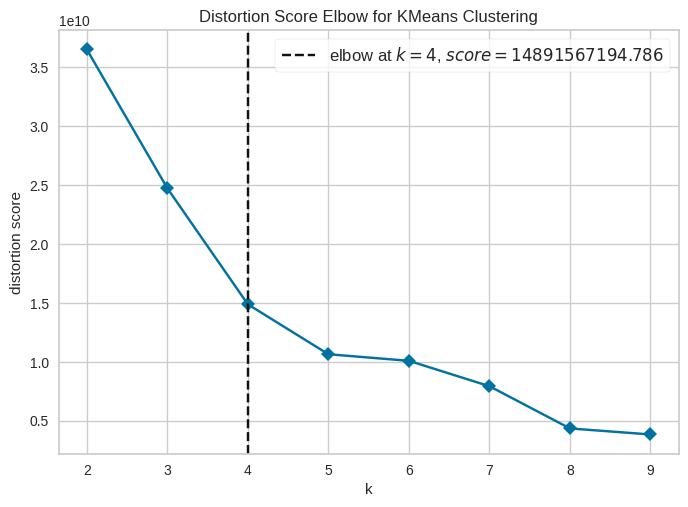

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
visualizer = KElbowVisualizer(km, k=(2,10), timings=False)
visualizer.fit(data)
visualizer.show()

We can see the elbow is at k=4 clusters.

In [24]:
num_clusters = 4

**2. Apply k-means.**

In [25]:
data_scaled = StandardScaler().fit_transform(data)
km=KMeans(n_clusters=num_clusters,random_state=1)
pred=km.fit_predict(data_scaled)
pred

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 3,
       1, 0, 2, 0, 0, 0, 3, 2, 2, 2, 0, 2, 0, 0, 1, 3, 2, 3, 1, 0, 0, 3,
       3, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 3, 3, 0, 0, 0, 1, 0, 3, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 3, 3, 2, 2, 0, 0, 1, 0, 2, 2, 3, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

**3. Apply hierarchical methods.**

In [26]:
ac=AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='complete')
pred=ac.fit_predict(data_scaled)
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

**4. Print model's clusters.**

In [27]:
data['Cluster']=pred

print("Cluster Summary:")
summary=data.groupby('Cluster').mean()
summary['Count']=data['Cluster'].value_counts()
summary=summary.sort_values('Count', ascending=False)
summary

Cluster Summary:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Count
Cluster,,,,,,,,,,
0,17.028440,42.291550,6.909358,43.039137,22581.559633,6.478321,75.302752,2.098073,17310.458716,109
1,81.344444,31.520741,6.660185,49.111111,3787.462963,8.926389,60.555556,4.697037,1910.074074,54
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,3
3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000,1


**5. Print the silhouette plot for a given clustering.**

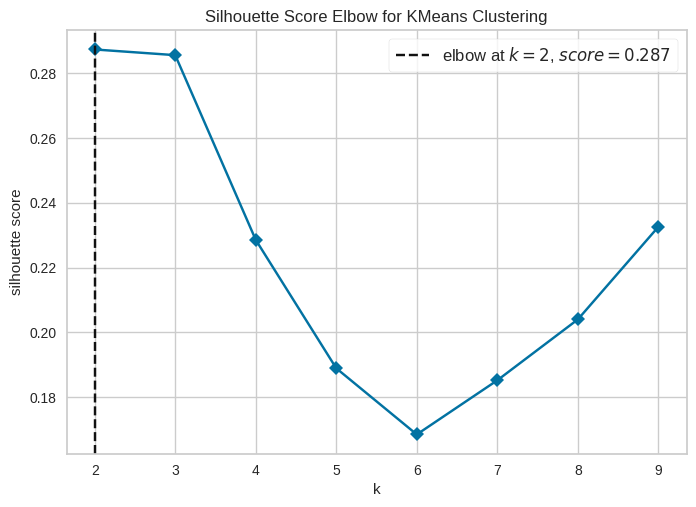

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [28]:
visualizer = KElbowVisualizer(km, k=(2,10), metric='silhouette', timings=False)
visualizer.fit(data_scaled)
visualizer.show()

**6. Describe the clusters obtained.**

In [29]:
df=pd.DataFrame(data=data_scaled,columns=data.columns[:-1])
df['Cluster']=pred
df.sort_values('Cluster',inplace=True, ascending=True)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
5,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
6,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233,0
...,...,...,...,...,...,...,...,...,...,...
149,0.605102,-1.423682,0.841419,-0.790911,-0.795759,1.776084,0.061390,2.174530,-0.512438,1
91,-0.882164,4.899083,0.348467,3.940415,3.878996,-0.394898,1.211786,-0.873224,5.036507,2
133,-0.882164,5.813835,-1.042755,5.266181,2.859238,-0.742749,1.369684,-1.191250,1.840665,2
98,-0.782681,4.094101,0.669799,4.437577,0.580393,-0.374972,1.099002,-1.052114,0.445220,2


<Axes: >

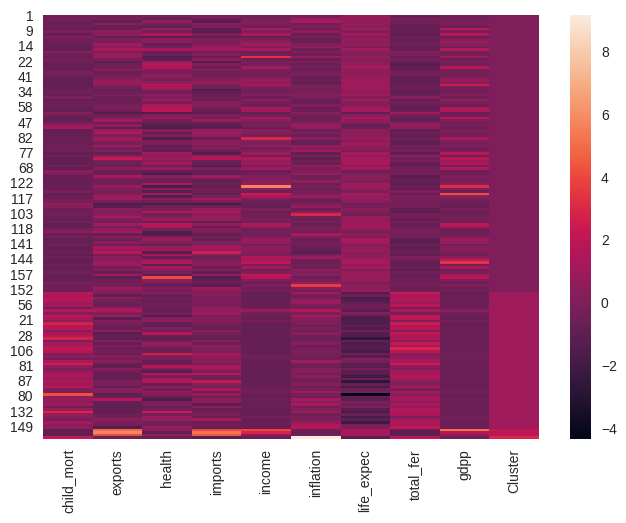

In [30]:
sns.heatmap(df)

<Axes: >

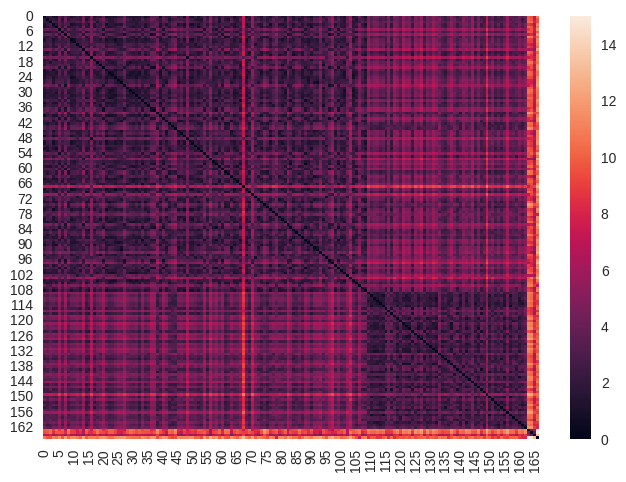

In [31]:
dist = pdist(df, metric='euclidean')
dist = squareform(dist)
sns.heatmap(dist)

# Task

Test kmeans clustering on example data:

In [32]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('../content/basic1.csv')
df

,x,y,color
0,79.408289,152.834424,0
1,98.046263,186.910700,0
2,240.578979,48.473684,1
3,109.687183,277.945769,0
4,249.626082,229.753352,1
...,...,...,...
9789,271.341817,152.122986,1
9790,374.928092,424.480854,2
9791,496.467434,317.553201,3
9792,484.710737,251.504081,3


<Axes: xlabel='x', ylabel='y'>

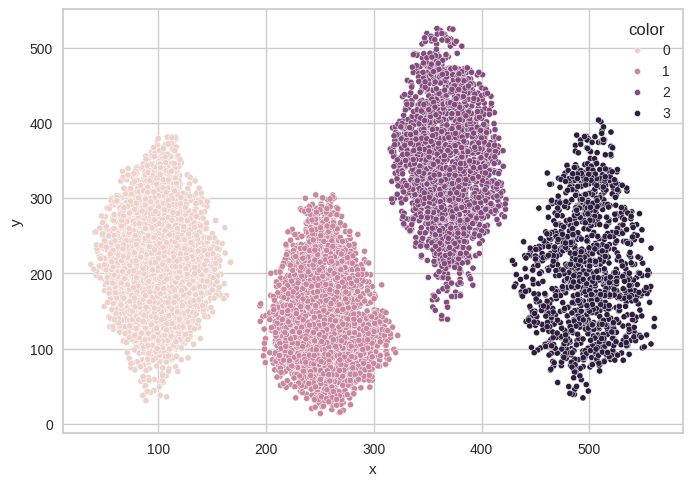

In [34]:
sns.scatterplot(data=df, x="x", y="y", hue="color", s=20)

In [35]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters, random_state=1)
km.fit(df)
pred=km.predict(df)

# We add the cluster number to the dataframe
df['cl']=pred

<Axes: xlabel='x', ylabel='y'>

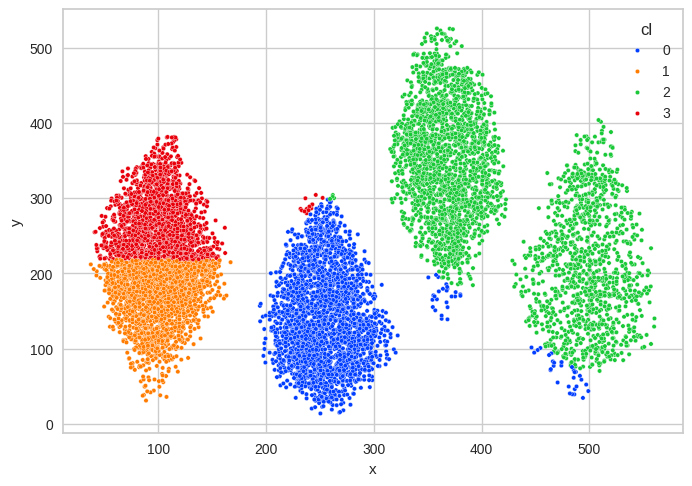

In [36]:
sns.scatterplot(data=df, x="x", y="y", hue="cl", palette="bright" ,s=10)